In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.style as style
style.use('fivethirtyeight')
%config InlineBackend.figure_format ='retina'

In [206]:
from tempfile import NamedTemporaryFile
import urllib.request
import matplotlib.font_manager as fm

In [207]:
def newFont(github_url,sizeFont):
    headers = {}
    headers[
        "User-Agent"
    ] = "Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17"
    url = github_url + '?raw=true'  # You want the actual file, not some html
    request = urllib.request.Request(url, headers=headers)
    response = urllib.request.urlopen(request)
    f = NamedTemporaryFile(delete=False, suffix='.ttf')
    f.write(response.read())
    f.close()    
    return fm.FontProperties(fname=f.name, size=sizeFont)

github_url = 'https://github.com/google/fonts/blob/master/ofl/playfairdisplay/static/PlayfairDisplay-Regular.ttf'
heading_font = newFont(github_url,20)

github_url = 'https://github.com/google/fonts/blob/master/apache/roboto/static/Roboto-Regular.ttf'
subtitle_font = newFont(github_url,16)

In [208]:
def load_dead(districtRegion,start_date):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/DRS_mortes.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    start=datetime.strptime(start_date, "%Y-%m-%d")+timedelta(days=10)
    start2=start.strftime("%Y-%m-%d")
    for i in range(0,len(df.date)):
        y.append(df[districtRegion].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2 =df2.apply (pd.to_numeric, errors='coerce')
    df2[start2:] = df2[start2:].replace({0:np.nan})
    df2 = df2.dropna()
    df2.index = pd.DatetimeIndex(df2.index)
    #interpolate missing data
    df2 = df2.reindex(pd.date_range(df2.index.min(), df2.index.max()), fill_value=np.nan)
    df2 = df2.interpolate(method='akima', axis=0).ffill().bfill()
    #string type for dates and integer for data
    df2 = df2.astype(int)
    df2.index = df2.index.astype(str)
    df2=df2[start_date:]
    return df2

In [209]:
version="119"
paramFile="data/param_optimized_Yabox_HistMin"+version+".csv"
dfparam = pd.read_csv(paramFile)
display(dfparam)
DRS=dfparam.DRS

,DRS,start-date,prediction-range,s0,e0,a0,i0,r0,d0,START,RATIO,WCASES,WREC
0,DRS 01 - Grande São Paulo,2020-03-21,200,20268871,0,0,41,0,233,140,0.15,0.3070,0.0
1,DRS 02 - Araçatuba,2020-03-30,200,660592,0,0,234,0,71,6,0.15,0.2136,0.0
2,DRS 03 - Araraquara,2020-04-02,200,711092,0,0,121,0,151,73,0.15,0.2617,0.0
3,DRS 04 - Baixada Santista,2020-03-28,200,810677,0,0,184,0,161,45,0.15,0.4406,0.0
4,DRS 05 - Barretos,2020-04-04,200,295706,0,0,164,0,215,182,0.15,0.3075,0.0
5,DRS 06 - Bauru,2020-04-04,200,821721,0,0,210,0,246,191,0.15,0.2608,0.0
6,DRS 07 - Campinas,2020-03-28,200,2091996,0,0,109,0,249,130,0.15,0.6601,0.0
7,DRS 08 - Franca,2020-04-02,200,562529,0,0,101,0,13,40,0.15,0.8251,0.0
8,DRS 09 - Marília,2020-04-04,200,744101,0,0,150,0,244,177,0.15,0.3622,0.0
9,DRS 10 - Piracicaba,2020-03-28,200,1078979,0,0,101,0,195,191,0.15,0.2597,0.0


In [210]:
districtRegion=DRS[0]
display(districtRegion)
start_date=dfparam.loc[dfparam.DRS==districtRegion,'start-date'].values[0]
display(start_date)
dead=load_dead(districtRegion,start_date)

'DRS 01 - Grande São Paulo'

'2020-03-21'

In [211]:
size = len(dead)
dead['date'] = dead.index
tspan=np.arange(0, size, 1)
dead.index=tspan

display(dead)

,,date
0,0,2020-03-21
1,0,2020-03-22
2,0,2020-03-23
3,0,2020-03-24
4,48,2020-03-25
...,...,...
333,31235,2021-02-17
334,31343,2021-02-18
335,31455,2021-02-19
336,31536,2021-02-20


In [212]:
import unicodedata

def plotFT(title,subTitle):
    
    #prepare plotting
    color_bg = '#FEF1E5'
    # lighter_highlight = '#FAE6E1'
    darker_highlight = '#FBEADC'
    plt.rc('font', size=14)
    
    fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
    ax.patch.set_facecolor(darker_highlight)

    # Adding a title and a subtitle
    ax.text(x = 0.02, y = 1.14, s = title,
                fontsize = 26, weight = 'bold', alpha = .75,transform=ax.transAxes, 
                fontproperties=heading_font)
    ax.text(x = 0.02, y = 1.09,
                s = subTitle,
                fontsize = 20, alpha = .85,transform=ax.transAxes, 
                fontproperties=subtitle_font)

    # Hide the left, right and top spines
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.annotate('Modeling Team ATS with support of IPT', 
    xy=(1.04, 0.1), xycoords='axes fraction',
    xytext=(0, 0), textcoords='offset points',
    ha='right',rotation=90,fontproperties=subtitle_font,fontsize = 16)
    plt.annotate('Dr. Guilherme Araujo Lima da Silva - gasilva@ats4i.com.br', 
    xy=(1.045,0.1), xycoords='axes fraction',
    xytext=(0, 0), textcoords='offset points',
    ha='left',rotation=90,fontproperties=subtitle_font,fontsize = 16)

    fig.tight_layout()
    
    return fig,ax
    

def loadDataFrame(filename):
    df= pd.read_pickle(filename)
    df.columns = [c.lower().replace(' ', '_') for c in df.columns]
    df.columns = [c.lower().replace('(', '') for c in df.columns]
    df.columns = [c.lower().replace(')', '') for c in df.columns]
    return df

def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [213]:
dR = strip_accents(districtRegion)
df = loadDataFrame('./data/SEAIRD_sigmaOpt_'+dR+version+'.pkl')

display(df)

,susceptible,exposed,asymptomatic,infected,recovered,deaths
date,,,,,,
2020-03-21,2.026887e+07,0.000000e+00,0.000000e+00,4.101792e+01,0.000000e+00,232.152192
2020-03-22,2.025375e+07,1.512029e+04,8.189218e-01,4.142849e+01,5.675226e+00,232.152192
2020-03-23,2.023766e+07,3.120637e+04,3.323245e+00,4.296361e+01,1.121684e+01,232.152192
2020-03-24,2.021951e+07,4.934714e+04,7.670854e+00,4.572857e+01,1.661993e+01,232.152192
2020-03-25,2.019808e+07,7.076305e+04,1.414411e+01,4.991169e+01,2.187020e+01,232.152192
...,...,...,...,...,...,...
2021-09-05,0.000000e+00,1.413543e+07,1.948441e+06,1.299535e+06,2.839248e+06,46919.305972
2021-09-06,5.366149e-12,1.412153e+07,1.950248e+06,1.300740e+06,2.850083e+06,46972.130905
2021-09-07,1.855619e-11,1.410765e+07,1.952040e+06,1.301936e+06,2.860928e+06,47024.646768


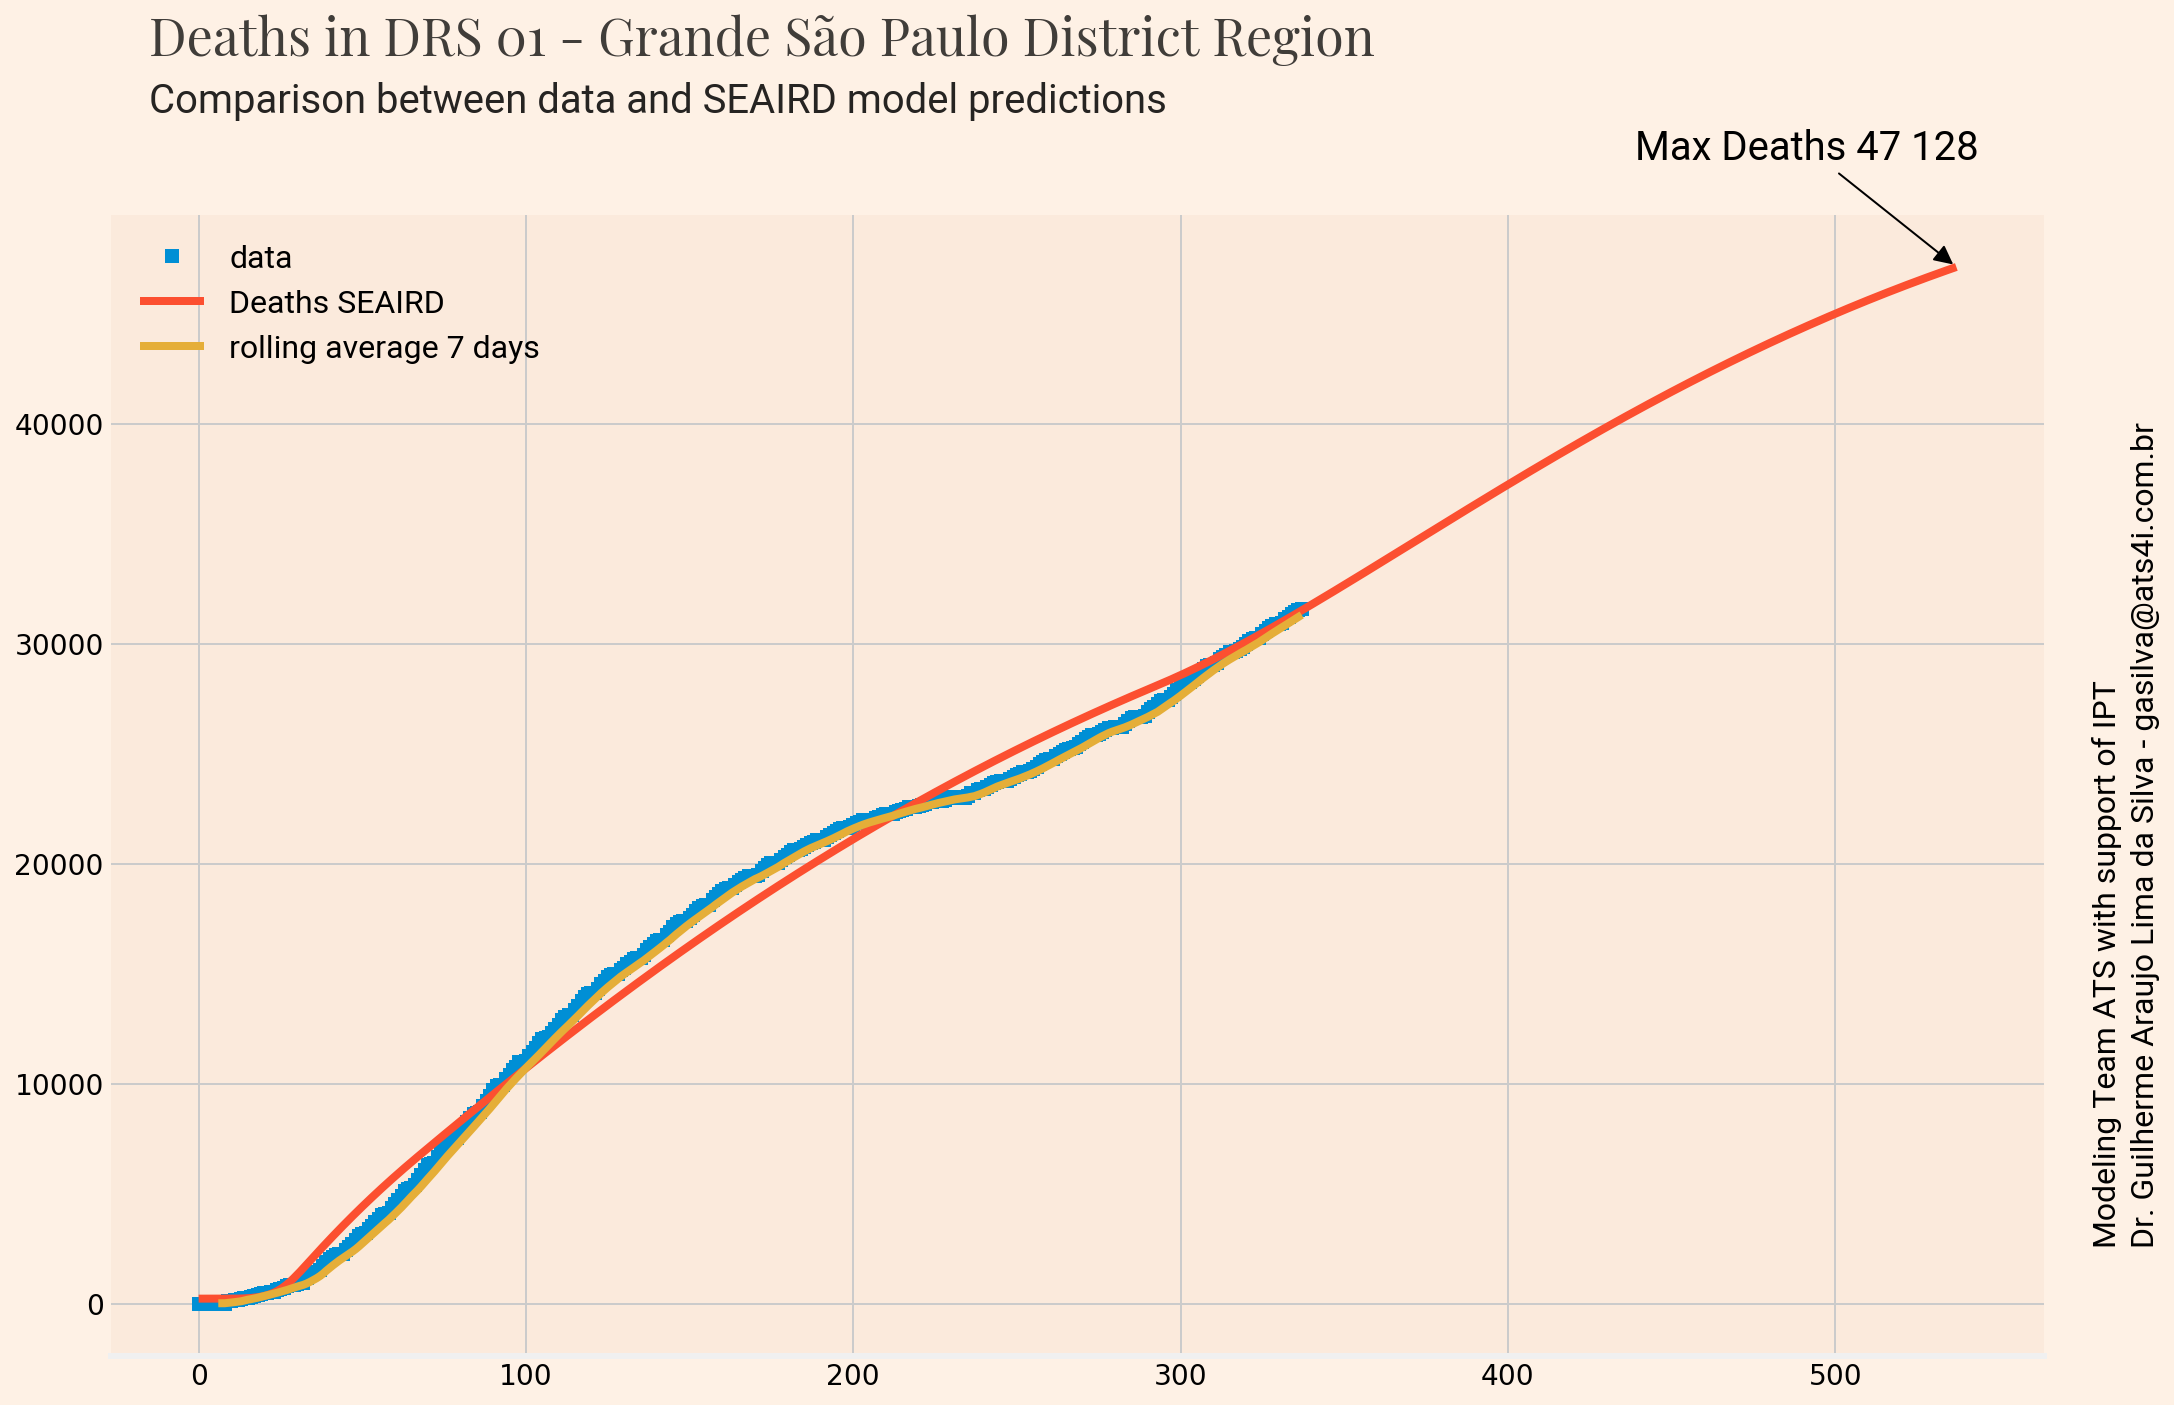

In [214]:
fig,ax = plotFT("Deaths in "+districtRegion+" District Region","Comparison between data and SEAIRD model predictions")

tspan3=np.arange(0, len(df['deaths'].values), 1)
maxD=max(df['deaths'])
maxInd=tspan3[df['deaths']==max(df['deaths'])][0]
ax.annotate("Max Deaths {:,}".format(int(df['deaths'].nlargest(1))).replace(',', ' '), 
     xy=(maxInd,maxD), 
     xytext=(-75,50), textcoords='offset points', ha='center', va='bottom',
    arrowprops=dict(arrowstyle='-|>', color='black', lw=1),fontsize=20,fontproperties=subtitle_font)
ax.plot(tspan,dead.iloc[:,0].values,'s',label='data')
ax.plot(tspan3,df['deaths'].values,'-',label="Deaths SEAIRD")
ax.plot(dead.iloc[:,0].rolling(7).mean(),'-',label='rolling average 7 days')
leg=ax.legend(frameon=False,fontsize=16,prop=subtitle_font)

In [215]:
from datetime import datetime

date_format="%Y-%m-%d"
lastDate=str(dead.date.values[-1])[:10]
display(lastDate)
finalDate=df.index[-1].strftime(date_format)
display(finalDate)
a = datetime.strptime(finalDate, date_format)
b = datetime.strptime(lastDate, date_format)
delta = a - b
print(delta.days)

df['error']=0
mask = (df['error'].index > lastDate)
df.loc[mask,'error']= (pd.to_datetime(df['error'].loc[mask].index)- \
        pd.to_datetime(dead.date.values[-1])).days*0.2/delta.days*df['deaths'].loc[mask]

'2021-02-21'

'2021-09-09'

200


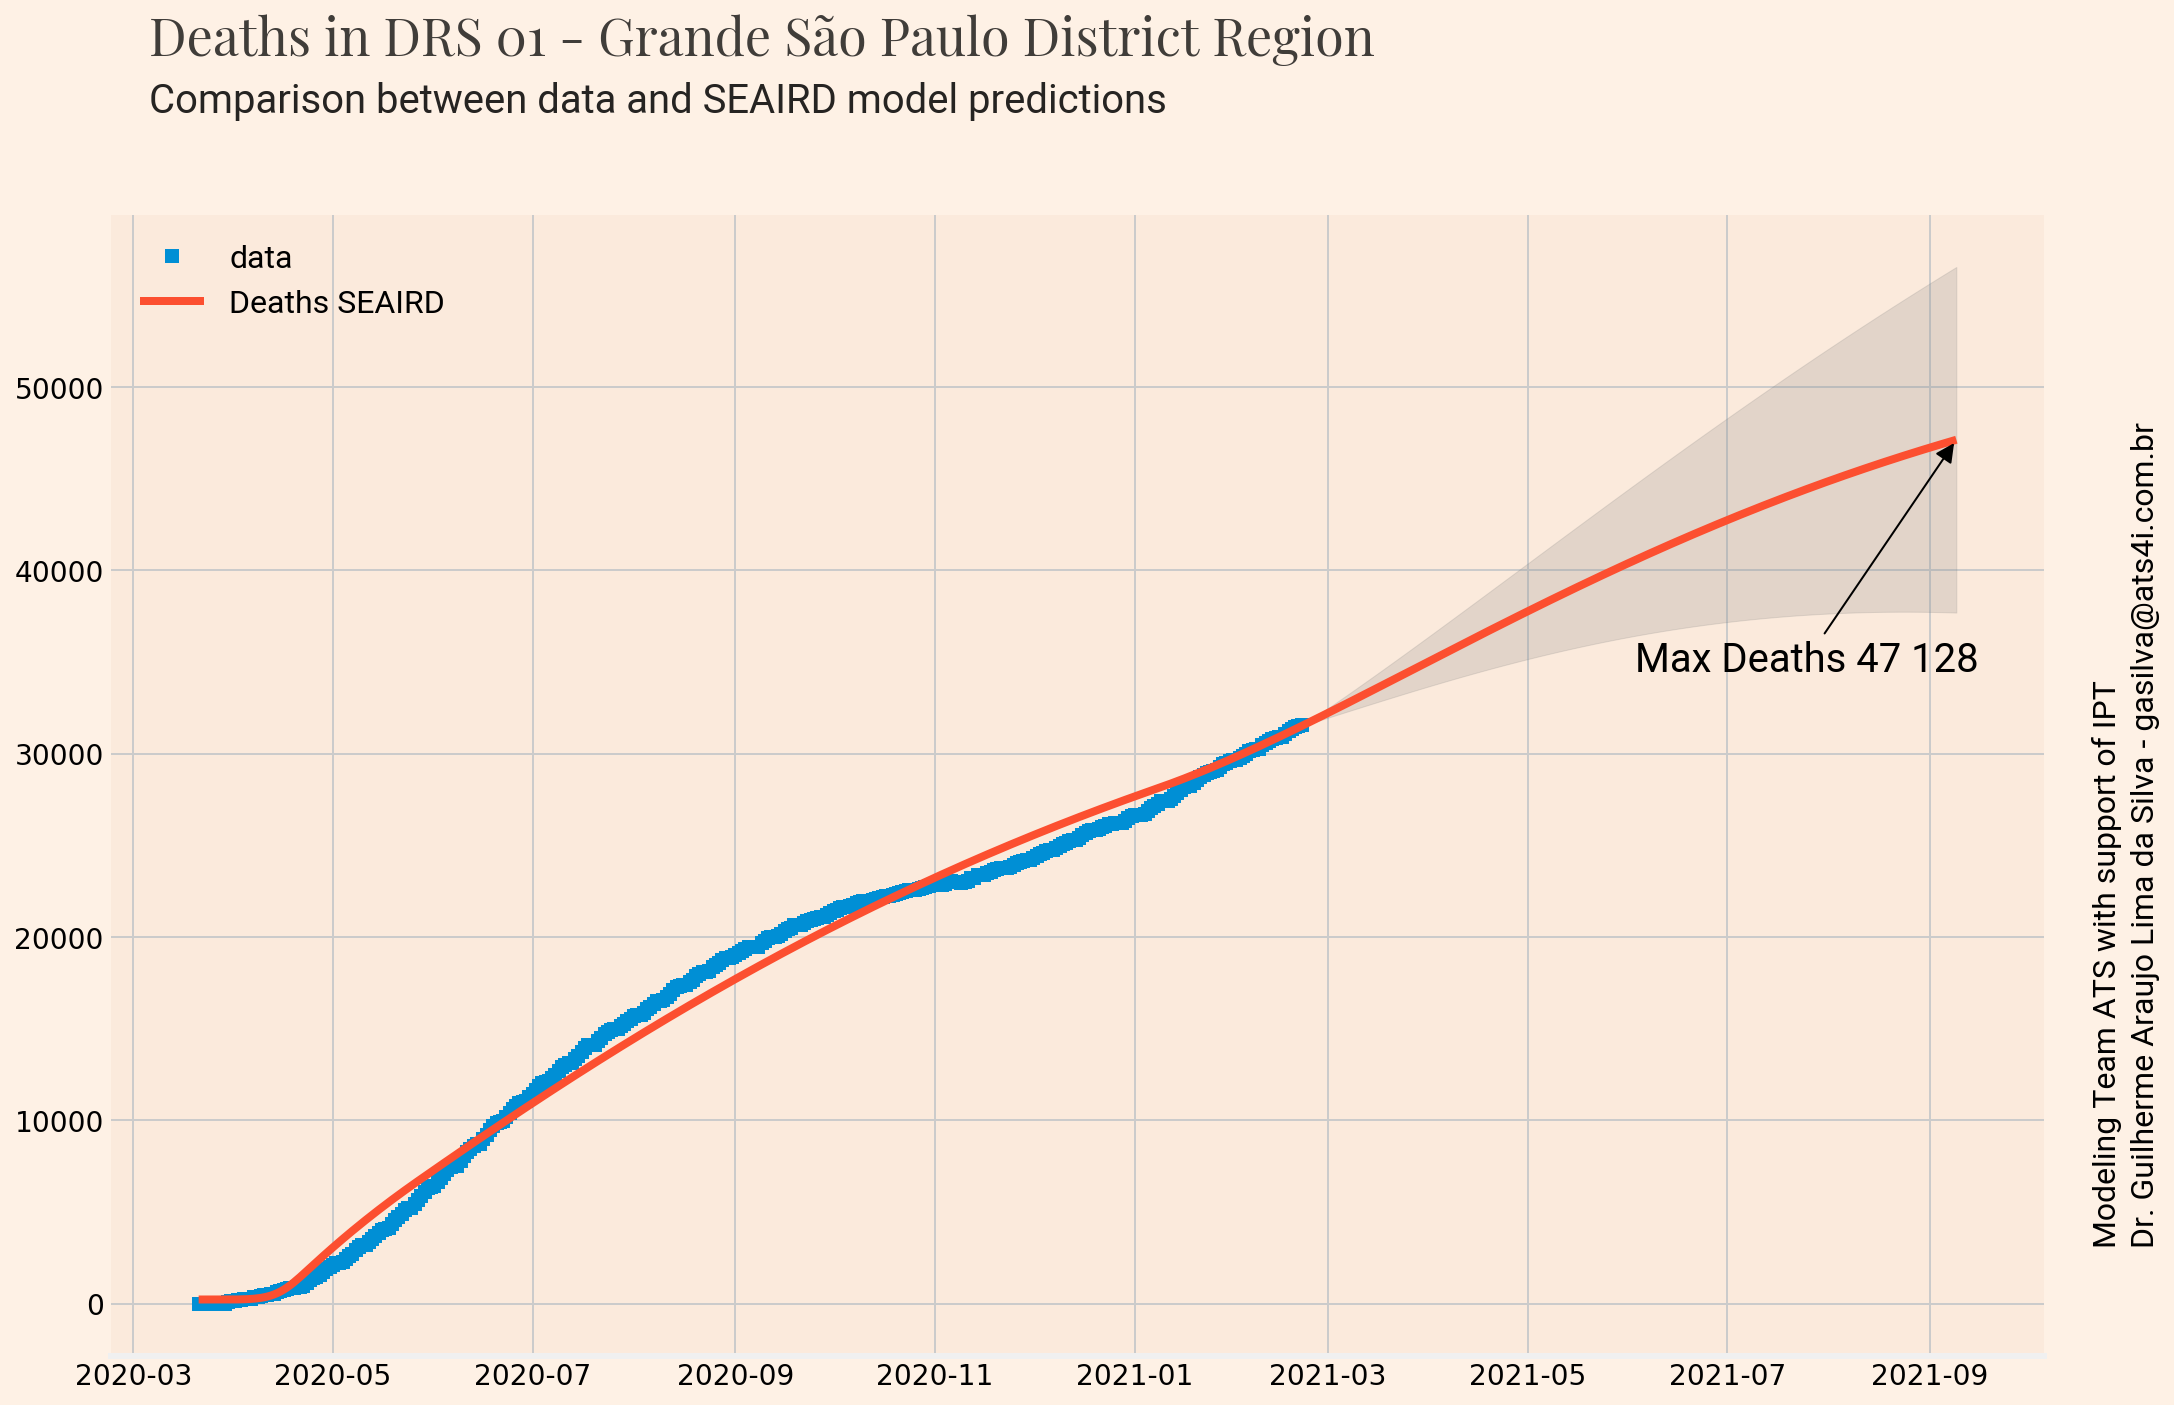

In [216]:
fig,ax = plotFT("Deaths in "+districtRegion+" District Region","Comparison between data and SEAIRD model predictions")
maxD=max(df['deaths'])
maxInd=df.index[df['deaths']==max(df['deaths'])][0]
ax.annotate("Max Deaths {:,}".format(int(df['deaths'].nlargest(1))).replace(',', ' '), 
     xy=(maxInd,maxD), 
     xytext=(-75,-120), textcoords='offset points', ha='center', va='bottom',
    arrowprops=dict(arrowstyle='-|>', color='black', lw=1),fontsize=20,fontproperties=subtitle_font)
dead['date'] = pd.to_datetime(dead['date'], format='%Y-%m-%d')
ax.plot(dead.date,dead.iloc[:,0].values,'s',label='data')
# ax.plot(dead.date,dead.iloc[:,0].rolling(7).mean(),'-',label='rolling average 7 days')
ax.plot(df['deaths'],'-',label="Deaths SEAIRD")
plt.fill_between(df.index,df['deaths']-df['error'], df['deaths']+df['error'],color='gray', alpha=0.2)
leg=ax.legend(frameon=False,fontsize=16,prop=subtitle_font,loc="upper left")

In [187]:
s2 = df.groupby([lambda x: x.year, lambda x: x.month]).mean()
display(s2)

susceptible       exposed  asymptomatic      infected     recovered  \
2020 3   2.012155e+07  1.472428e+05  4.641724e+01  7.128008e+01  2.803010e+01   
     4   9.350474e+06  1.089910e+07  1.074121e+04  7.198034e+03  5.524228e+02   
     5   9.543143e+01  2.014194e+07  6.837505e+04  4.561422e+04  7.661026e+03   
     6   2.996918e-06  1.989910e+07  1.980756e+05  1.320717e+05  3.040369e+04   
     7   5.507054e-06  1.959121e+07  3.517395e+05  2.345039e+05  7.856095e+04   
     8   2.137163e-07  1.928314e+07  4.903688e+05  3.269140e+05  1.522202e+05   
     9   6.783397e-07  1.898475e+07  6.111643e+05  4.074361e+05  2.462931e+05   
     10  1.555700e-07  1.869100e+07  7.178884e+05  4.785782e+05  3.594882e+05   
     11  5.584830e-06  1.840178e+07  8.120492e+05  5.413455e+05  4.893948e+05   
     12  2.877145e-05  1.811706e+07  8.947480e+05  5.964722e+05  6.341823e+05   
2021 1   1.920855e-08  1.775902e+07  1.011081e+06  6.740206e+05  7.963718e+05   
     2   4.315614e-16  1.726418e+07  1.198950e+06  7.992560e+05  9.758835e+05   
     3   3.166243e-17  1.677585e+07  1.365535e+06  9.103028e+05  1.184030e+06   
     4   3.633988e-17  1.628532e+07  1.513801e+06  1.009138e+06  1.424746e+06   
     5   4.889615e-16  1.580921e+07  1.639837e+06  1.093156e+06  1.688196e+06   
     6   3.793895e-15  1.534695e+07  1.746200e+06  1.164058e+06  1.970797e+06   
     7   0.000000e+00  1.489828e+07  1.834783e+06  1.223108e+06  2.269704e+06   
     8   7.937309e-15  1.445565e+07  1.908698e+06  1.272380e+06  2.587264e+06   
     9   1.614631e-13  1.417660e+07  1.949087e+06  1.299304e+06  2.797938e+06   

               deaths        error  
2020 3     233.133644     0.000000  
     4    1109.185431     0.000000  
     5    5494.080527     0.000000  
     6    9524.943810     0.000000  
     7   13156.130349     0.000000  
     8   16523.065091     0.000000  
     9   19514.398690     0.000000  
     10  22193.447622     0.000000  
     11  24579.087663     0.000000  
     12  26687.281128     0.000000  
2021 1   28649.279414     0.000000  
     2   30863.116098    31.827390  
     3   33412.304015   775.584343  
     4   36115.117015  1938.729027  
     5   38712.460469  3258.423742  
     6   41103.607648  4711.930625  
     7   43232.889987  6273.990446  
     8   45108.278168  7943.514417  
     9   46172.600744  9050.160468

In [188]:
s2PerMonth=s2.diff(periods = 1)
display(s2PerMonth)

susceptible       exposed   asymptomatic       infected  \
2020 3            NaN           NaN            NaN            NaN   
     4  -1.077107e+07  1.075186e+07   10694.794780    7126.753492   
     5  -9.350379e+06  9.242834e+06   57633.833692   38416.190188   
     6  -9.543143e+01 -2.428409e+05  129700.522206   86457.483123   
     7   2.510136e-06 -3.078907e+05  153663.928983  102432.230241   
     8  -5.293338e-06 -3.080711e+05  138629.300834   92410.109457   
     9   4.646234e-07 -2.983866e+05  120795.512552   80522.078433   
     10 -5.227697e-07 -2.937445e+05  106724.113938   71142.057087   
     11  5.429260e-06 -2.892240e+05   94160.757291   62767.300056   
     12  2.318662e-05 -2.847245e+05   82698.833917   55126.761146   
2021 1  -2.875224e-05 -3.580382e+05  116333.410473   77548.320482   
     2  -1.920855e-08 -4.948383e+05  187868.922971  125235.410637   
     3  -3.998990e-16 -4.883341e+05  166584.294425  111046.823559   
     4   4.677447e-18 -4.905259e+05  148265.931379   98835.549793   
     5   4.526216e-16 -4.761069e+05  126036.818373   84017.335168   
     6   3.304933e-15 -4.622616e+05  106362.848581   70902.413311   
     7  -3.793895e-15 -4.486734e+05   88582.936712   59050.096082   
     8   7.937309e-15 -4.426247e+05   73914.327344   49271.807229   
     9   1.535257e-13 -2.790528e+05   40389.306420   26923.752439   

             recovered       deaths        error  
2020 3             NaN          NaN          NaN  
     4      524.392652   876.051786     0.000000  
     5     7108.602881  4384.895096     0.000000  
     6    22742.661068  4030.863283     0.000000  
     7    48157.264832  3631.186540     0.000000  
     8    73659.268327  3366.934742     0.000000  
     9    94072.906729  2991.333599     0.000000  
     10  113195.118650  2679.048932     0.000000  
     11  129906.588709  2385.640041     0.000000  
     12  144787.436266  2108.193465     0.000000  
2021 1   162189.503751  1961.998287     0.000000  
     2   179511.771968  2213.836684    31.827390  
     3   208146.583029  2549.187916   743.756953  
     4   240715.413054  2702.813000  1163.144684  
     5   263450.223573  2597.343455  1319.694715  
     6   282600.877718  2391.147178  1453.506883  
     7   298907.520735  2129.282340  1562.059821  
     8   317560.306666  1875.388181  1669.523971  
     9   210673.823341  1064.322575  1106.646051

In [189]:
dead2=dead.set_index('date')
#del dead2['diff']

d2=dead2.groupby([lambda x: x.year, lambda x: x.month]).mean()
d2PerMonth=d2.diff(periods = 1)

deadsDiff=[]
deadsDiff=pd.concat([d2PerMonth, s2PerMonth['deaths']], axis=1)
deadsDiff=deadsDiff.fillna(0)
deadsDiff.columns = ['data','SEAIRD']
display(deadsDiff)

data       SEAIRD
2020 3      0.000000     0.000000
     4    776.512121   876.051786
     5   3233.646237  4384.895096
     6   4914.887097  4030.863283
     7   4667.532258  3631.186540
     8   3713.096774  3366.934742
     9   2881.270968  2991.333599
     10  1945.470968  2679.048932
     11  1273.362366  2385.640041
     12  2054.831183  2108.193465
2021 1   2610.096774  1961.998287
     2   2543.600614  2213.836684
     3      0.000000  2549.187916
     4      0.000000  2702.813000
     5      0.000000  2597.343455
     6      0.000000  2391.147178
     7      0.000000  2129.282340
     8      0.000000  1875.388181
     9      0.000000  1064.322575

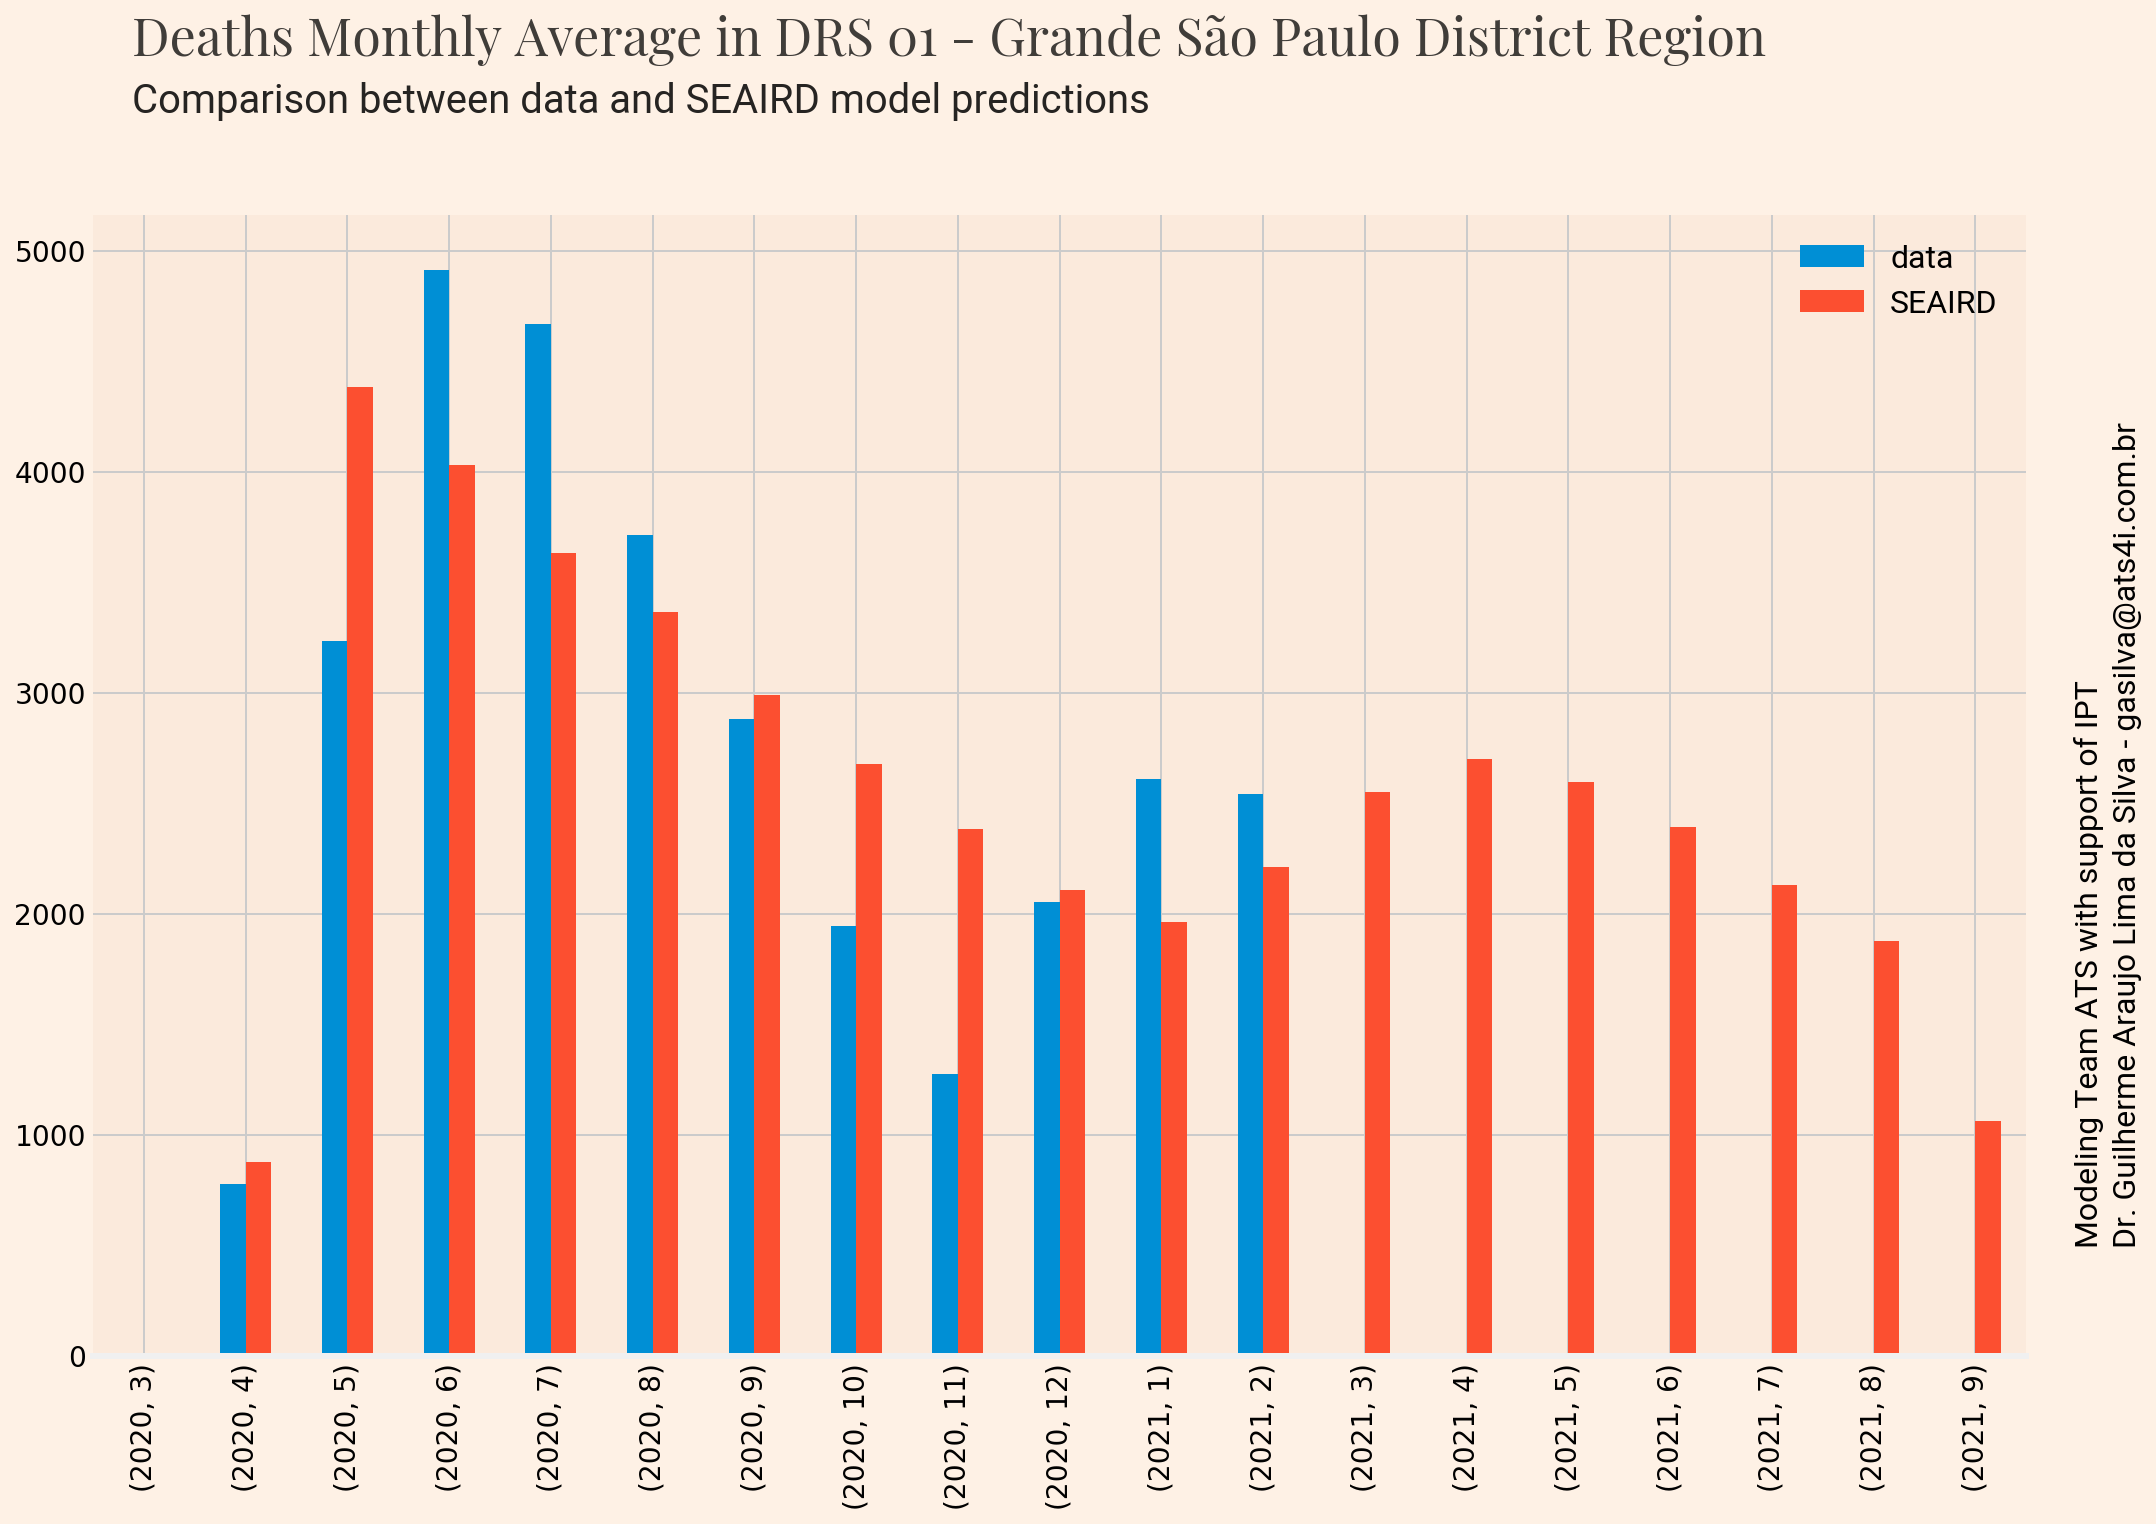

In [190]:
fig,ax = plotFT("Deaths Monthly Average in "+districtRegion+" District Region","Comparison between data and SEAIRD model predictions")
deadsDiff.plot(kind="bar",ax=ax)
leg=ax.legend(frameon=False,fontsize=16,prop=subtitle_font)


In [191]:
diffDead=np.diff(dead.iloc[:,0].T[:])
diffDead=np.insert(diffDead,0,0)
dead['diff']=diffDead
display(dead)

,,date,diff
0,0,2020-03-21,0
1,0,2020-03-22,0
2,0,2020-03-23,0
3,0,2020-03-24,0
4,48,2020-03-25,48
...,...,...,...
333,31235,2021-02-17,129
334,31343,2021-02-18,108
335,31455,2021-02-19,112
336,31536,2021-02-20,81


,,date,diff
0,0,2020-03-21,0
1,0,2020-03-22,0
2,0,2020-03-23,0
3,0,2020-03-24,0
4,48,2020-03-25,48
...,...,...,...
333,31235,2021-02-17,129
334,31343,2021-02-18,108
335,31455,2021-02-19,112
336,31536,2021-02-20,81


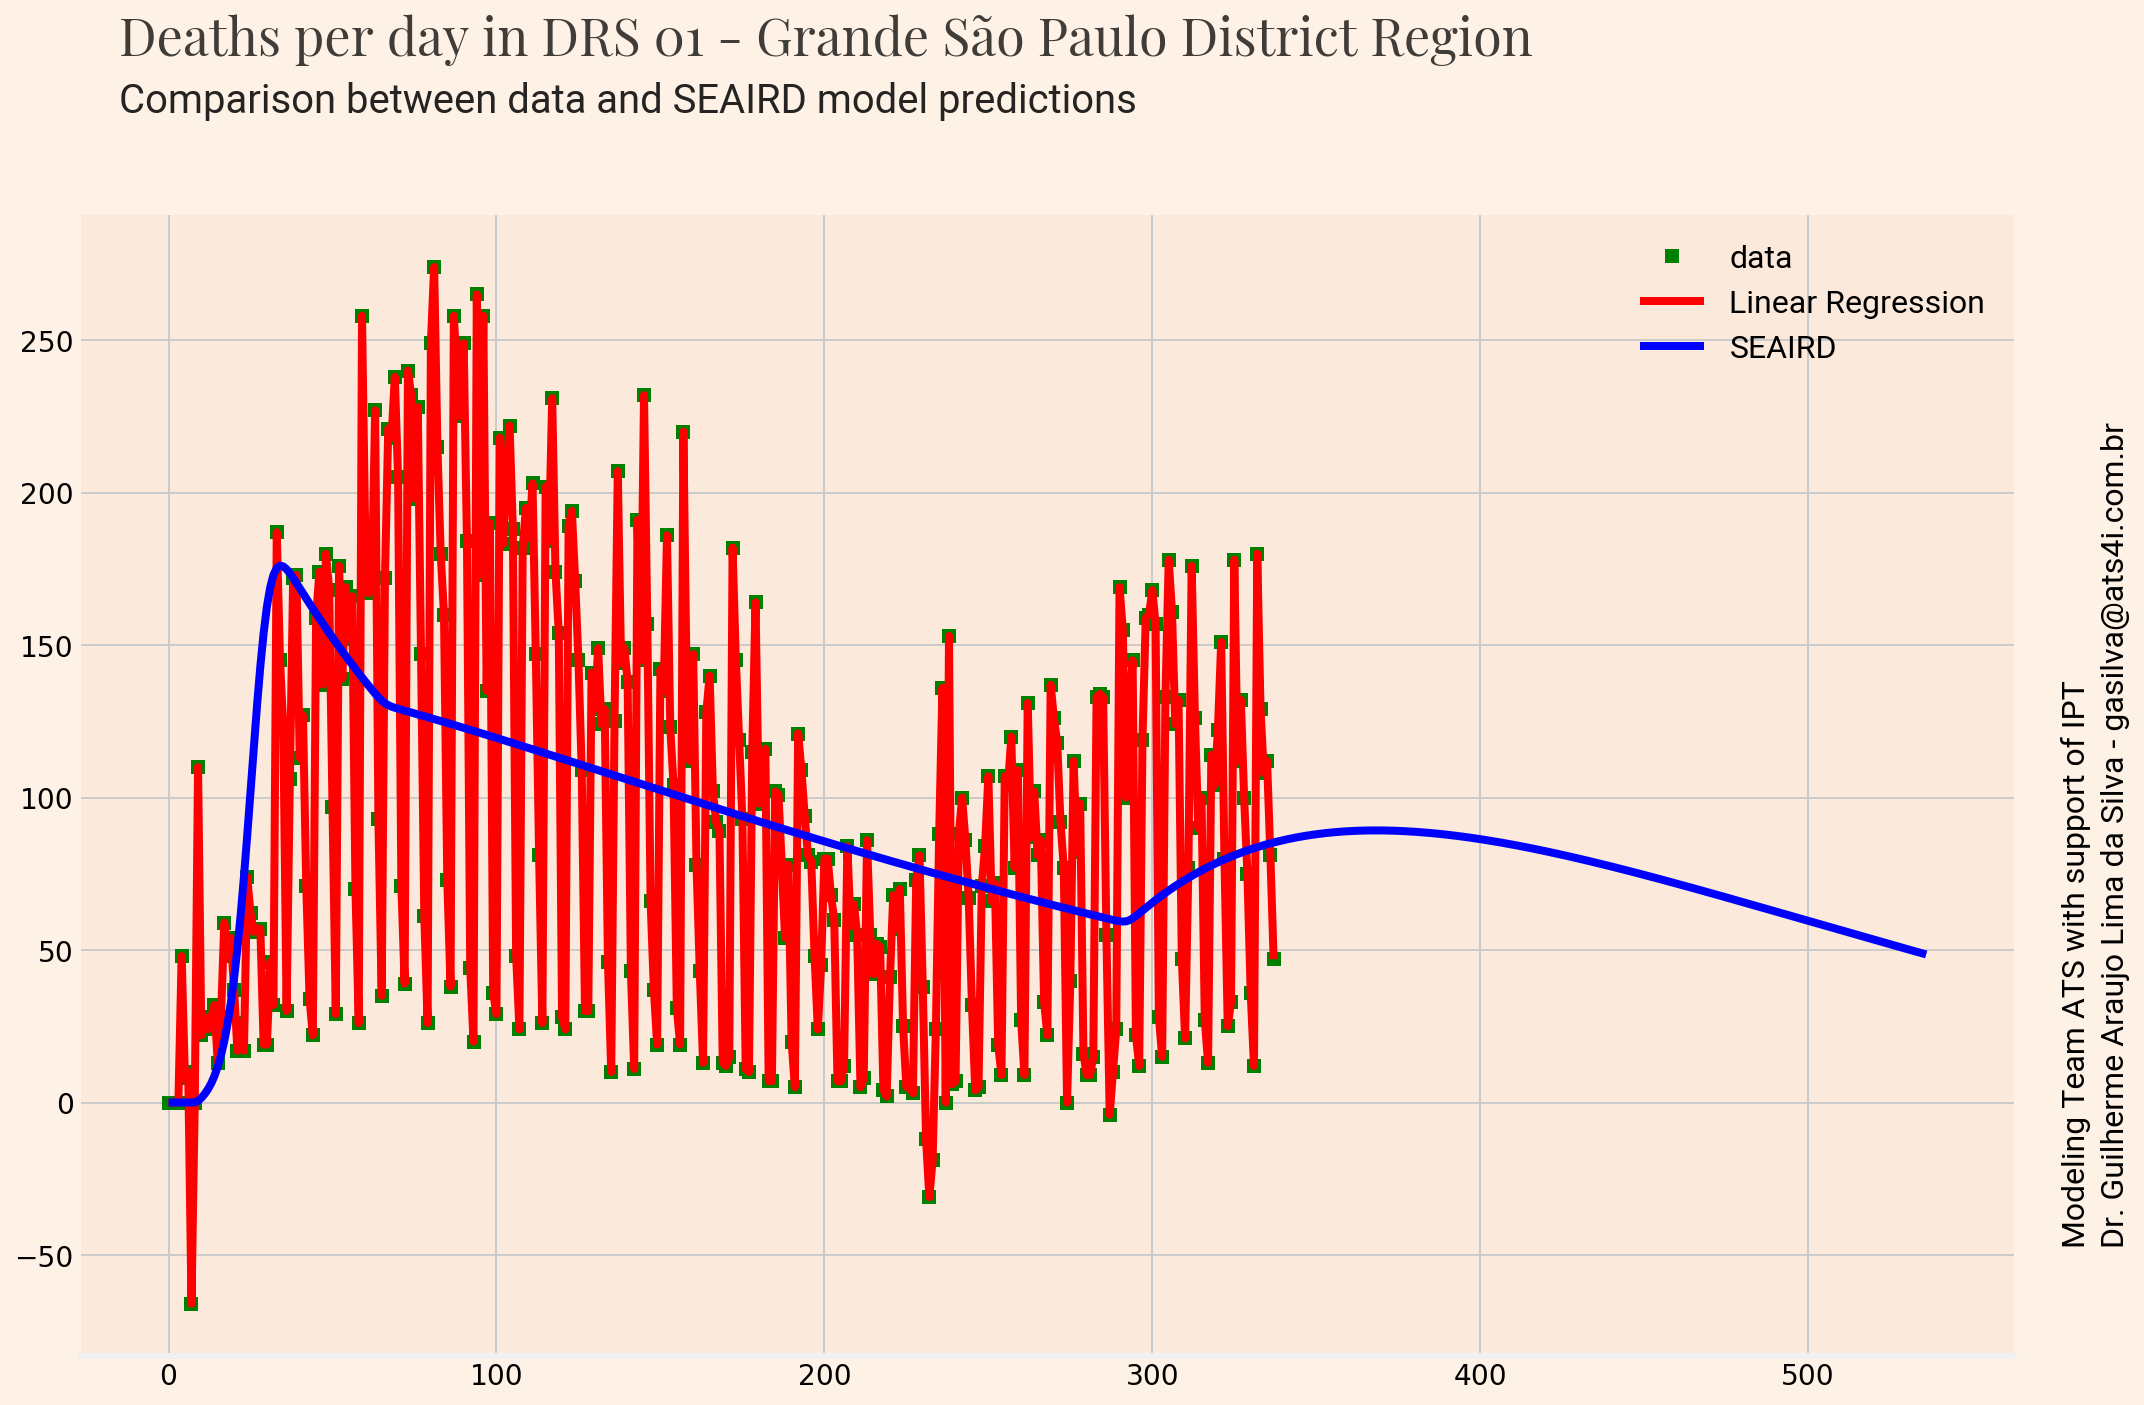

In [192]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

regr.fit([dead.index.values.T], [dead['diff'].values])

tspan1=np.arange(0, size, 1)
results = regr.predict([tspan1])

display(dead)

fig,ax = plotFT("Deaths per day in "+districtRegion+" District Region","Comparison between data and SEAIRD model predictions")
ax.plot(dead['diff'],'gs',label='data')
ax.plot(tspan1,results[0],'r-',label='Linear Regression')
diffDeaths=np.diff(df['deaths'].values)
size4=len(diffDeaths)
ax.plot(np.arange(0, size4, 1),diffDeaths,'b',label='SEAIRD')
leg=ax.legend(frameon=False,fontsize=16,prop=subtitle_font)


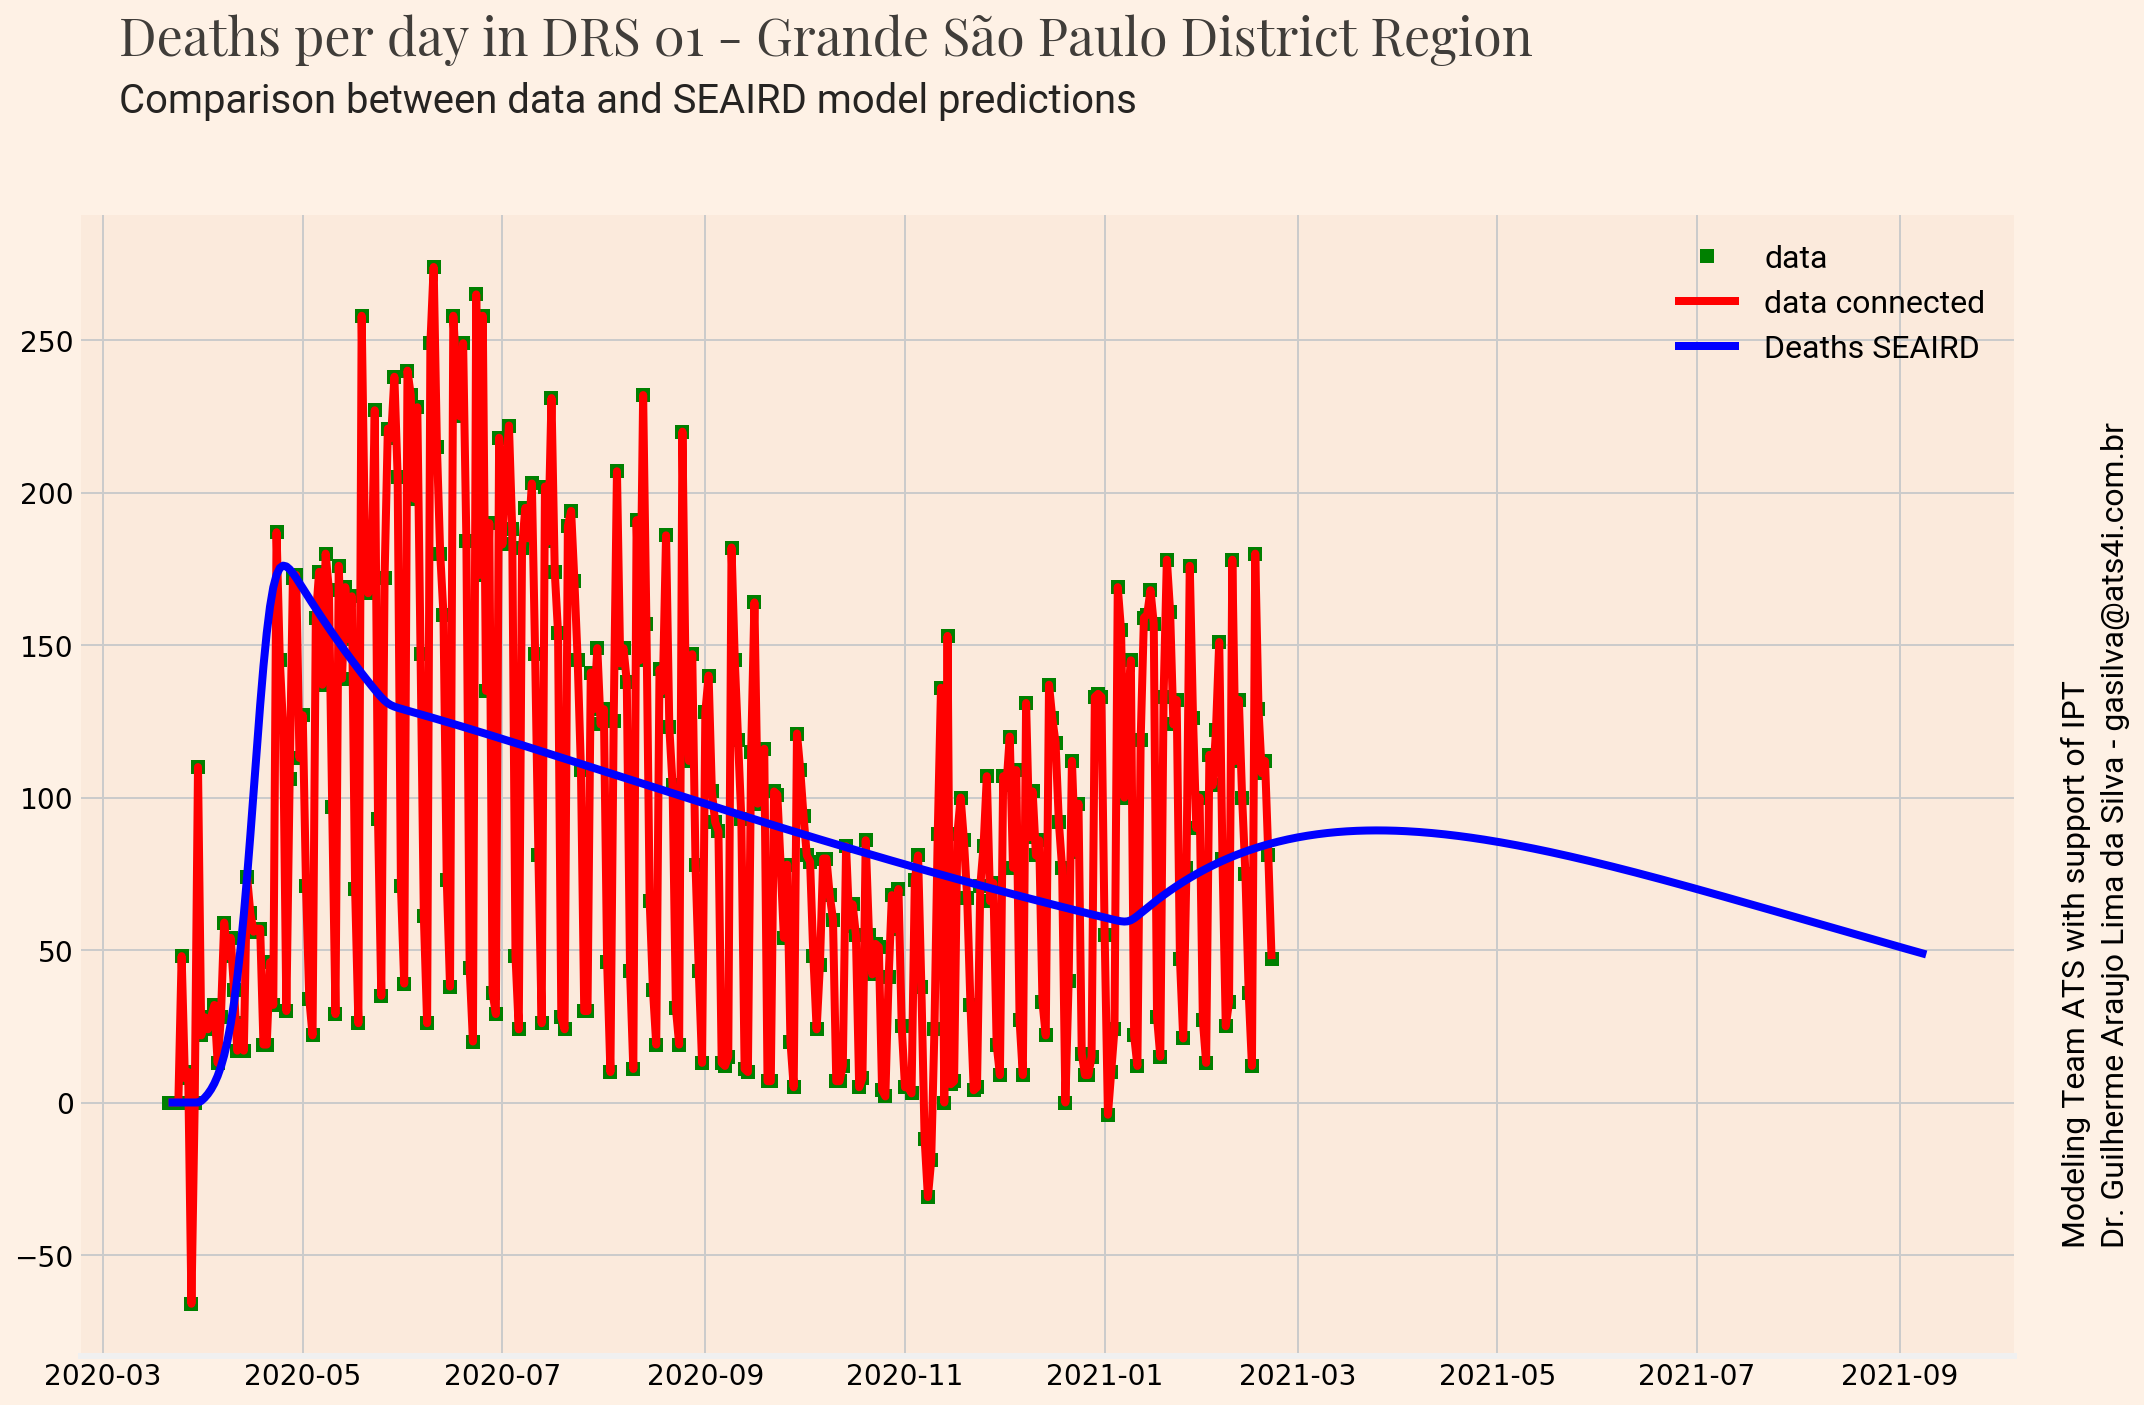

In [193]:
fig,ax = plotFT("Deaths per day in "+districtRegion+" District Region","Comparison between data and SEAIRD model predictions")
ax.plot(dead.date,dead['diff'],'gs',label='data')
ax.plot(dead.date,dead['diff'],'r-',label='data connected')

diffDeaths=np.diff(df['deaths'].values)
diffDeaths=np.insert(diffDeaths,0,0)
df['diffDeaths']=diffDeaths
ax.plot(df['diffDeaths'],'b',label='Deaths SEAIRD')
leg=ax.legend(frameon=False,fontsize=16,prop=subtitle_font)

In [194]:

# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = dead['diff'].values
# fit model
model = ARIMA(data, order=(5, 1, 1))
model_fit = model.fit()
display(model_fit.summary())
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)
pred=model_fit.get_forecast(steps=200).predicted_mean

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  338
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1751.579
Date:                Fri, 26 Feb 2021   AIC                           3517.159
Time:                        04:18:33   BIC                           3543.899
Sample:                             0   HQIC                          3527.817
                                - 338                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1535      0.053     -2.901      0.004      -0.257      -0.050
ar.L2         -0.4785      0.042    -11.342      0.000      -0.561      -0.396
ar.L3         -0.4068      0.048     -8.404      0.000      -0.502      -0.312
ar.L4         -0.3688      0.048     -7.701      0.000      -0.463      -0.275
ar.L5         -0.5268      0.061     -8.582      0.000      -0.647      -0.407
ma.L1         -0.6035      0.060    -10.047      0.000      -0.721      -0.486
sigma2      1891.7703    119.765     15.796      0.000    1657.036    2126.505
===================================================================================
Ljung-Box (L1) (Q):                   7.71   Jarque-Bera (JB):                32.92
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.51
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

[86.60880579]


array([-1.02182222e-01,  1.10658533e+02])

array([100.,  50.,   0., 100.])

100%|██████████| 500/500 [00:02<00:00, 177.42trial/s, best loss: 5164.37528001735]  


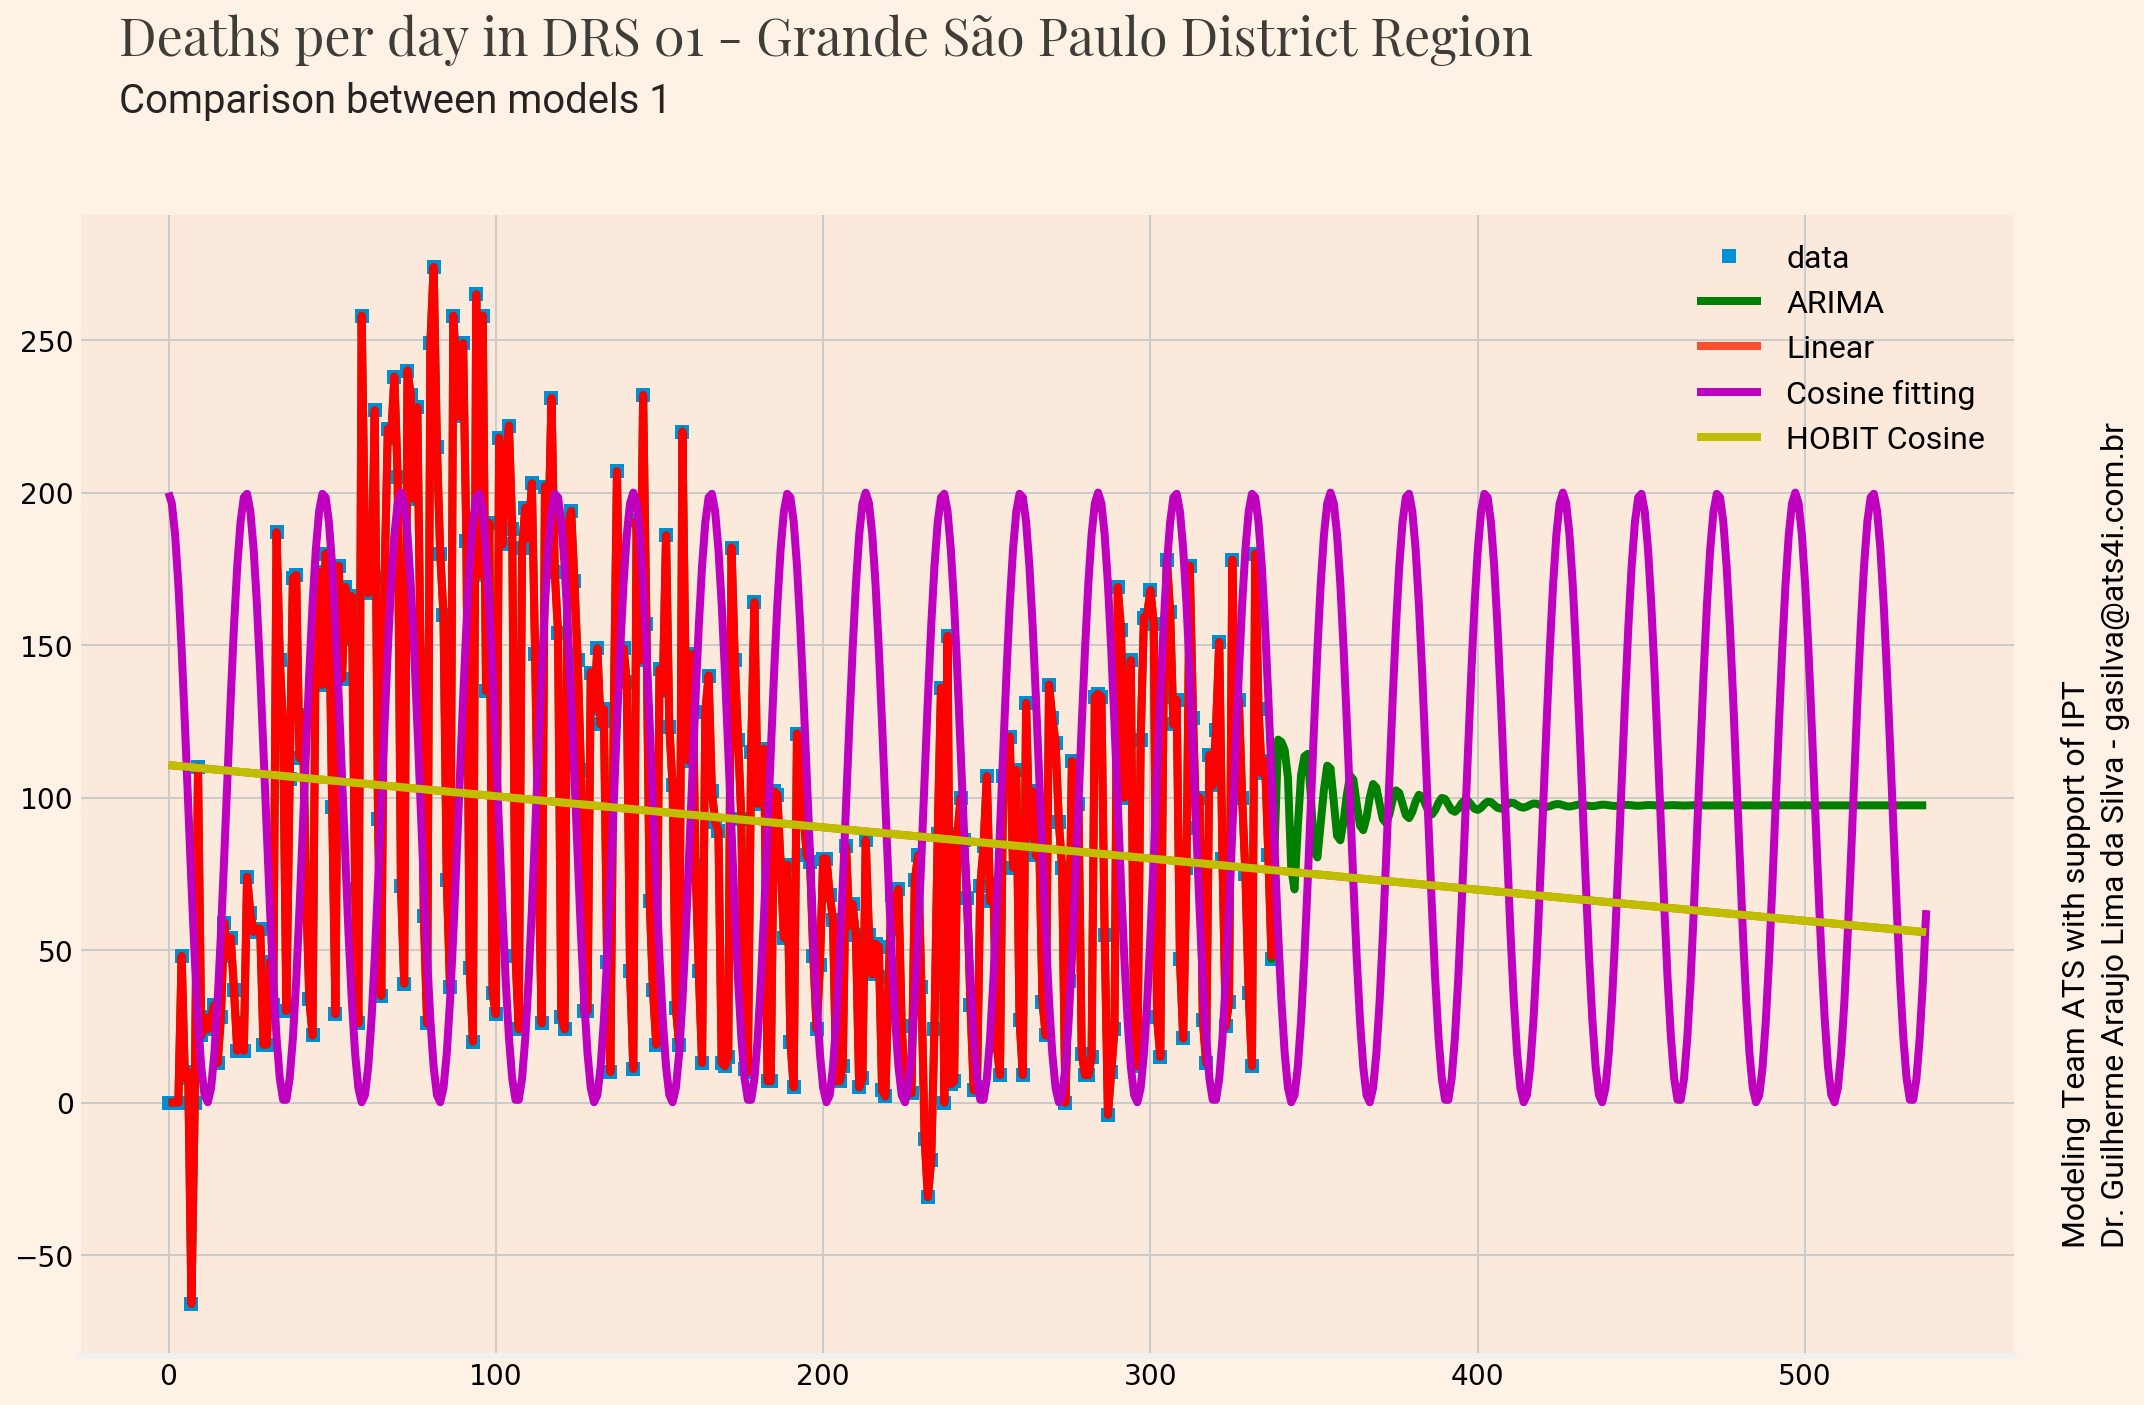

In [195]:
from scipy.optimize import curve_fit

fig,ax = plotFT("Deaths per day in "+districtRegion+" District Region","Comparison between models 1")

ax.plot(dead['diff'],'s',label="data")
tspan2=np.arange(0, size+200, 1)
pred2=np.append(dead.iloc[:,2].values,pred)
ax.plot(tspan2,pred2,'g-',label="ARIMA")
ax.plot(tspan1,results[0],'r-')

coef=np.polyfit(tspan, dead.iloc[:,2].values, 1)
display(coef)
pred3=tspan2*coef[0]+coef[1]
ax.plot(tspan2,pred3,label="Linear")

def deadFit(data,a,b,c,d):
    return a*np.cos(b*data-c)+d

fittedParameters, pcov =curve_fit(deadFit, tspan, dead.iloc[:,1].values,
                                 bounds=((0, 0, -np.pi, 0), (200, 100, np.pi, 200)))

display(fittedParameters)

a, b, c, d = fittedParameters

pred4=deadFit(tspan2,a,b,c,d)
ax.plot(tspan2,pred4,'m',label="Cosine fitting")

from HOBIT import RegressionForTrigonometric
from IPython.display import display, Math

seed = 12345512
trig_reg = RegressionForTrigonometric()
trig_reg.fit_cos(tspan, dead.iloc[:,2].values, max_evals=500, rstate=np.random.RandomState(seed))

trig_reg.best_parameters

y3 = trig_reg.predict(tspan2)
ax.plot(tspan2,y3,'y',label="HOBIT Cosine")
leg=ax.legend(frameon=False,fontsize=16,prop=subtitle_font)


In [196]:
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
y_data=dead.iloc[:,2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tspan, y_data, test_size=0.2, random_state=42)
ix=np.where(y_train>0)
X_train=X_train[ix]
y_train=y_train[ix]

In [197]:
def objective(a0, a1, w, f, gamma):
    """Objective function to minimize"""
    return np.mean((a0+ a1 * np.exp(-gamma*X_train)*np.cos(w*X_train + f) - y_train)**2)

In [198]:
def objective2(args):
    return objective(*args)

def objective3(p):
    a0, a1, w, f, gamma = p
    return np.mean((a0+ a1 * np.exp(-gamma*X_train)*np.cos(w*X_train + f) - y_train)**2)

def objective4(p):
    a0, a1, gamma = p
    ix=np.where(y_train>0)
    sol=a0-a1*np.exp(-gamma*X_train[ix])
#     sol=np.maximum(sol,0)
    return np.mean((sol - y_train[ix])**2)

def objective5(p,t):
    a0, a1, gamma = p
    return (a0-a1*np.exp(-gamma*t))


In [199]:
space = [hp.uniform('a0', 0, 200),
         hp.uniform('a1', 0, 200), 
         hp.uniform('w', 0, 0.5), 
         hp.uniform('f', -np.pi, np.pi),
         hp.uniform('gamma',0,0.0125)
        ]

tpe_algo = tpe.suggest
tpe_trials = Trials()

tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=2000, rstate=np.random.RandomState(seed))

print(tpe_best)

100%|██████████| 2000/2000 [00:42<00:00, 47.11trial/s, best loss: 3372.577547935319] 
{'a0': 93.6352557032915, 'a1': 127.69121321140368, 'f': -2.381620343862213, 'gamma': 0.004951176791535668, 'w': 0.024752486082495705}


In [200]:
x_data=tspan2
y = tpe_best['a0'] + np.exp(-tpe_best['gamma']*x_data)*tpe_best['a1'] * np.cos(tpe_best['w'] * x_data + tpe_best['f'])

In [201]:
bnds = ((-200,200),(-200,200),(0,1))
x0 = [50,50,0.001]
minimizer_kwargs = { "method": "L-BFGS-B","bounds":bnds }
optimal = basinhopping(objective4, x0, minimizer_kwargs=minimizer_kwargs,niter=100) 
print(optimal.x)
print(optimal.fun)

[9.74861056e+01 1.51573889e+02 7.18262254e-02]
4408.141193828807


In [202]:
y2=objective5(optimal.x,tspan2)

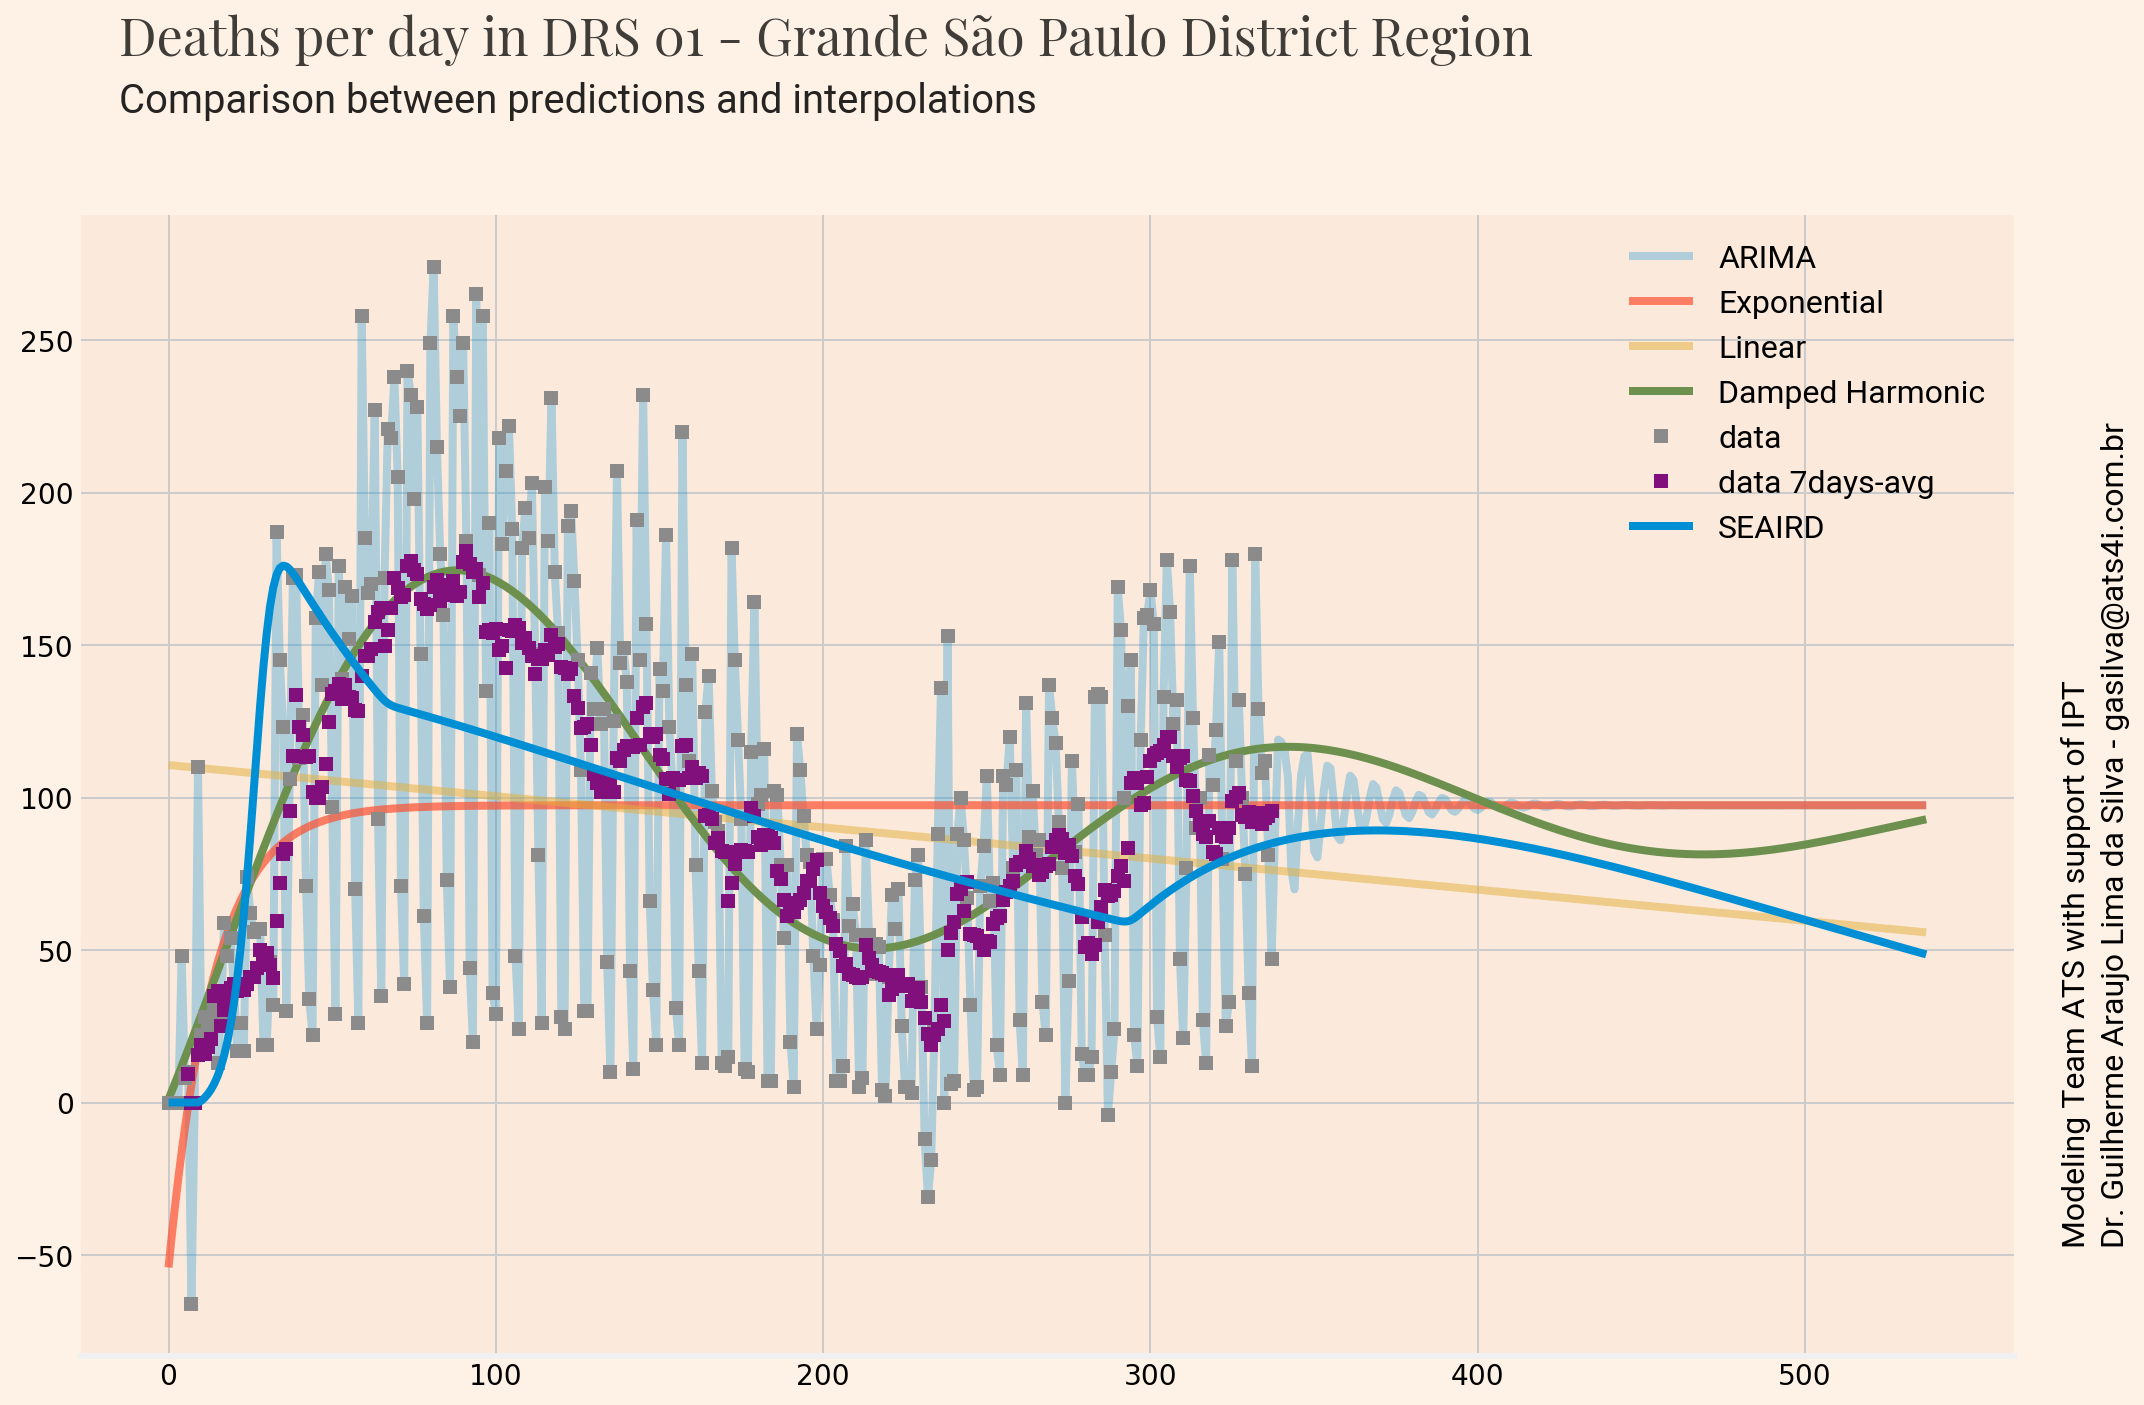

In [203]:
fig,ax = plotFT("Deaths per day in "+districtRegion+" District Region","Comparison between predictions and interpolations")



tspan2=np.arange(0, size+200, 1)
pred2=np.append(dead.iloc[:,2].values,pred)
ax.plot(tspan2,pred2,'-',label='ARIMA',alpha=0.3)
ax.plot(tspan2,y2,label='Exponential',alpha=0.7)
pred3=tspan2*coef[0]+coef[1]
ax.plot(tspan2,pred3,'-',label='Linear',alpha=0.5)
# ax.plot(tspan2,pred4,'b',label='cosine')
ax.plot(tspan2,y,label='Damped Harmonic',alpha=1)
ax.plot(dead['diff'],'s',label='data')
ax.plot(dead['diff'].rolling(window=7).mean(),'s',label='data 7days-avg')
size4=len(diffDeaths)
ax.plot(np.arange(0, size4, 1),diffDeaths,label='SEAIRD')
#ax.plot(tspan1,results[0],'-')
leg=ax.legend(frameon=False,fontsize=16,prop=subtitle_font)


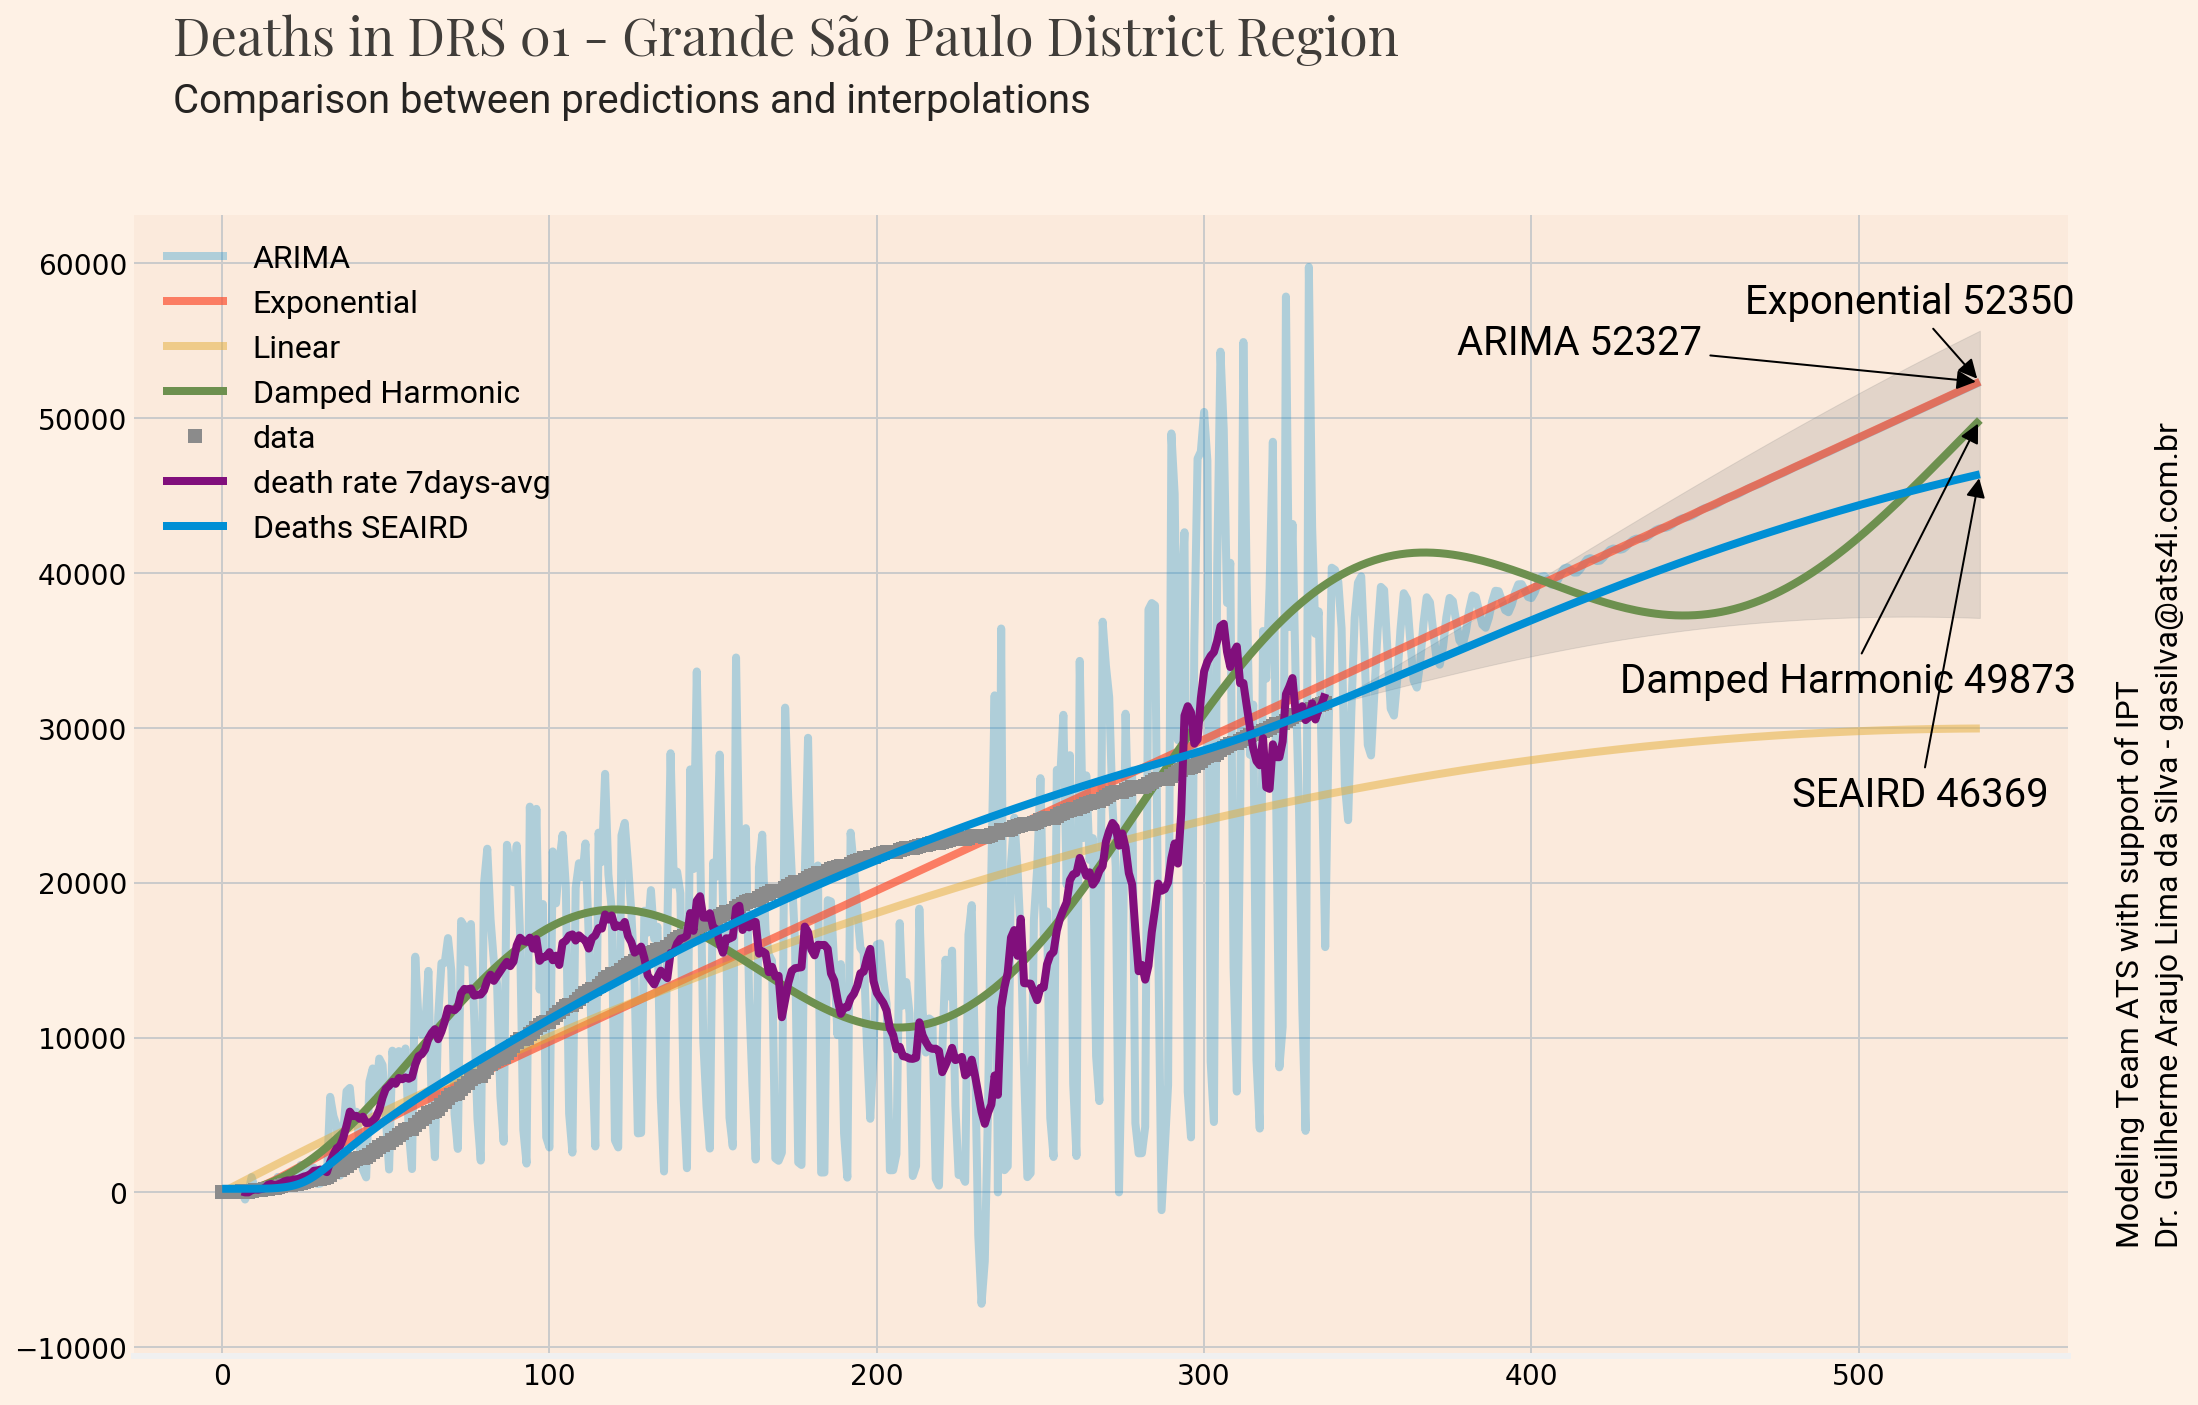

In [204]:
fig,ax = plotFT("Deaths in "+districtRegion+" District Region","Comparison between predictions and interpolations")


maxD=pred2[-1]*tspan2[-1]
maxInd=tspan2[-1]
ax.annotate("ARIMA {:}".format(int(pred2[-1]*tspan2[-1])), 
     xy=(maxInd,maxD), 
     xytext=(-200,10), textcoords='offset points', ha='center', va='bottom',
    arrowprops=dict(arrowstyle='-|>', color='black', lw=1),fontsize=20,fontproperties=subtitle_font)
ax.plot(tspan2,pred2*tspan2,label='ARIMA',alpha=0.3)

tspan3=np.arange(0, len(df['deaths'].values), 1)
maxD=y2[-1]*tspan2[-1]
maxInd=tspan2[-1]
ax.annotate("Exponential {:}".format(int(y2[-1]*tspan2[-1])), 
     xy=(maxInd,maxD), 
     xytext=(-35,30), textcoords='offset points', ha='center', va='bottom',
    arrowprops=dict(arrowstyle='-|>', color='black', lw=1),fontsize=20,fontproperties=subtitle_font)
ax.plot(tspan2,y2*tspan2,label='Exponential',alpha=0.7)

ax.plot(tspan2,pred3*tspan2,label='Linear',alpha=0.5)

maxD=y[-1]*tspan2[-1]
maxInd=tspan2[-1]
ax.annotate("Damped Harmonic {:}".format(int(y[-1]*tspan2[-1])), 
     xy=(maxInd,maxD), 
     xytext=(-180,-140), textcoords='offset points', ha='left', va='bottom',
    arrowprops=dict(arrowstyle='-|>', color='black', lw=1),fontsize=20,fontproperties=subtitle_font)
ax.plot(tspan2,y*tspan2,label='Damped Harmonic',alpha=1)

ax.plot(tspan,dead.iloc[:,0].values,'s',label='data')
ax.plot(tspan,dead['diff'].rolling(window=7).mean()*tspan,'-',label='death rate 7days-avg')


maxD=max(df['deaths'])
maxInd=tspan3[df['deaths']==max(df['deaths'])][0]
ax.annotate("SEAIRD {:}".format(int(df['deaths'].nlargest(1))), 
     xy=(maxInd,maxD), 
     xytext=(-30,-170), textcoords='offset points', ha='center', va='bottom',
    arrowprops=dict(arrowstyle='-|>', color='black', lw=1),fontsize=20,fontproperties=subtitle_font)

ax.plot(tspan3,df['deaths'].values,'-',label="Deaths SEAIRD")

plt.fill_between(tspan3,df['deaths']-df['error'],df['deaths']+df['error']
                 ,color='gray', alpha=0.2)

#ax.set_yscale('log')
leg=ax.legend(frameon=False,fontsize=16,prop=subtitle_font)
